In [ ]:
# center_coordinates_train and _val were obtained in preprocessing UNet
center_coordinates_train = [
[ 93.0  , 112.0 ],
[ 126.0  , 131.0 ],
[ 79.0  , 127.0 ],
[ 89.0  , 139.0 ],
[ 85.0  , 126.0 ],
[ 83.0  , 126.0 ],
[ 85.0  , 137.0 ],
[ 101.0  , 147.0 ],
[ 104.0  , 134.0 ],
[ 92.0  , 137.0 ],
[ 86.0  , 138.0 ],
[ 107.0  , 127.0 ],
[ 85.0  , 135.0 ],
[ 71.0  , 138.0 ],
[ 119.0  , 92.0 ],
[ 116.0  , 146.0 ],
[ 115.0  , 92.0 ],
[ 89.0  , 119.0 ],
[ 94.0  , 128.0 ],
[ 109.0  , 151.0 ],
[ 82.0  , 137.0 ],
[ 98.0  , 145.0 ],
[ 92.0  , 133.0 ],
[ 82.0  , 125.0 ],
[ 80.0  , 153.0 ],
[ 116.0  , 151.0 ],
[ 120.0  , 68.0 ],
[ 87.0  , 133.0 ],
[ 111.0  , 76.0 ],
[ 98.0  , 78.0 ],
[ 106.0  , 110.0 ],
[ 111.0  , 83.0 ],
[ 99.0  , 122.0 ],
[ 92.0  , 146.0 ],
[ 85.0  , 126.0 ],
[ 69.0  , 150.0 ],
[ 124.0  , 140.0 ],
[ 112.0  , 114.0 ],
[ 129.0  , 159.0 ],
[ 76.0  , 138.0 ],
[ 88.0  , 123.0 ],
[ 80.0  , 130.0 ],
[ 116.0  , 89.0 ],
[ 111.0  , 97.0 ],
[ 112.0  , 144.0 ],
[ 145.0  , 101.0 ],
[ 170.0  , 101.0 ],
[ 98.0  , 136.0 ],
[ 109.0  , 91.0 ],
[ 86.0  , 106.0 ],
[ 118.0  , 159.0 ],
[ 113.0  , 130.0 ],
[ 114.0  , 93.0 ],
[ 121.0  , 102.0 ],
[ 73.0  , 141.0 ],
[ 79.0  , 147.0 ],
[ 122.0  , 129.0 ],
[ 92.0  , 152.0 ],
[ 76.0  , 116.0 ],
[ 75.0  , 134.0 ],
[ 87.0  , 146.0 ],
[ 66.0  , 125.0 ],
[ 62.0  , 88.0 ],
[ 90.0  , 124.0 ],
[ 95.0  , 120.0 ],
[ 82.0  , 118.0 ],
[ 88.0  , 110.0 ],
[ 109.0  , 136.0 ],
[ 106.0  , 133.0 ],
[ 108.0  , 72.0 ],
[ 78.0  , 119.0 ],
[ 71.0  , 135.0 ],
[ 117.0  , 69.0 ],
[ 95.0  , 138.0 ],
[ 121.0  , 146.0 ],
[ 84.0  , 130.0 ],
[ 104.0  , 135.0 ],
[ 122.0  , 77.0 ],
[ 79.0  , 122.0 ],
[ 104.0  , 130.0 ]]

center_coordinates_val = [
[ 92.0  , 100.0 ],
[ 82.0  , 148.0 ],
[ 81.0  , 121.0 ],
[ 100.0  , 62.0 ],
[ 90.0  , 132.0 ],
[ 100.0  , 130.0 ],
[ 93.0  , 124.0 ],
[ 73.0  , 134.0 ],
[ 77.0  , 112.0 ],
[ 102.0  , 139.0 ],
[ 90.0  , 130.0 ],
[ 99.0  , 125.0 ],
[ 122.0  , 129.0 ],
[ 104.0  , 131.0 ],
[ 88.0  , 111.0 ],
[ 114.0  , 95.0 ],
[ 91.0  , 133.0 ],
[ 71.0  , 119.0 ],
[ 101.0  , 122.0 ],
[ 115.0  , 138.0 ]]


In [ ]:
# print length of train and val center coordinates to check whether its length is the same as the train and val split
print('Length of train center coordinates: ', len(center_coordinates_train))
print('Length of validation center coordinates: ', len(center_coordinates_val))

Length of train center coordinates:  80
Length of validation center coordinates:  20


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!cp /content/drive/MyDrive/COLAB/DL_3D_MIA_project/metrics_acdc.py /content

!pip install SimpleITK
!pip install nibabel
!pip install medpy
!pip install monai
import SimpleITK as sitk
import nibabel as nib
import monai

import numpy as np
import matplotlib.pyplot as plt
import torch
import os
import glob

from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

from metrics_acdc import load_nii

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'The used device is {device}')

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48.4 MB 1.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 151 kB 5.3 MB/s 
  Created wheel for medpy: filename=MedPy-0.4.0-cp37-cp37m-linux_x86_64.whl size=754493 sha256=c7ef38f5880282c8118d9d3e4ed223c14107b0562dfb00f03584d3340c01c253
  Stored in directory: /root/.cache/pip/wheels/b0/57/3a/da1183f22a6afb42e11138daa6a759de233fd977a984333602
Successfully built medpy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 939 kB 5.2 MB/s 
The used device is cuda


# Construct the dictionary of file paths

In [ ]:
# split of dataset in train and val must be based on patients (not on image slices)
# use seed for random_state so that the method is reproducible
train_patient, validation_patient = train_test_split(range(1,101), train_size=0.8, random_state=42)
print('Patient numbers in train dataset: ', train_patient)
print('Patient numbers in validation dataset: ', validation_patient)

def build_dict_acdc(data_path, prediction_path, mode='train'):
    """
    This function returns a list of dictionaries, each dictionary containing the keys 'img' and 'mask' 
    that returns the path to the corresponding image.
    
    Args:
        data_path (str): path to the root folder of the data set.
        mode (str): subset used. Must correspond to 'train', 'val' or 'test'.
        
    Returns:
        (List[Dict[str, str]]) list of the dictionaries containing the paths of images and masks.
    """
    # test if mode is correct
    if mode not in ["train", "val", "test"]:
        raise ValueError(f"Please choose a mode in ['train', 'val', 'test']. Current mode is {mode}.")
    
    # define empty dictionary
    dicts = []
    target = train_patient if mode == "train" else validation_patient 
    # make a corresponding list for all the mask files
    for patient_nb in target:
        # set patient_path
        patient_path = os.path.join(data_path, 'patient'+'{0:03}'.format(patient_nb))

        # extract ED and ES frame number from patient info
        patient_info = os.path.join(patient_path, 'Info.cfg')
        file = open(patient_info, 'r').readlines()
        ED_frame = int(file[0].split(':')[1])
        ES_frame = int(file[1].split(':')[1])

        # set image and mask paths
        image_path = []
        image_path.append(os.path.join(patient_path, 'patient'+'{0:03}'.format(patient_nb)+'_frame'+'{0:02}'.format(ED_frame)+'.nii.gz'))
        image_path.append(os.path.join(patient_path, 'patient'+'{0:03}'.format(patient_nb)+'_frame'+'{0:02}'.format(ES_frame)+'.nii.gz'))

        mask_path = []
        mask_path.append(os.path.join(patient_path, 'patient'+'{0:03}'.format(patient_nb)+'_frame'+'{0:02}'.format(ED_frame)+'_gt.nii.gz'))
        mask_path.append(os.path.join(patient_path, 'patient'+'{0:03}'.format(patient_nb)+'_frame'+'{0:02}'.format(ES_frame)+'_gt.nii.gz'))

        # set paths for predicted segmentations for preprocessing model
        prediction_preprocessing_path = []
        prediction_preprocessing_path.append(os.path.join(prediction_path,'predicted_segmentation_patient'+str(patient_nb)+'.npy'))
        prediction_preprocessing_path.append(os.path.join(prediction_path,'predicted_segmentation_patient'+str(patient_nb)+'.npy'))

        dicts.append({'img': image_path, 'mask': mask_path, 'prediction_preprocessing': prediction_preprocessing_path})
    return dicts


Patient numbers in train dataset:  [56, 89, 27, 43, 70, 16, 41, 97, 10, 73, 12, 48, 86, 29, 94, 6, 67, 66, 36, 17, 50, 35, 8, 96, 28, 20, 82, 26, 63, 14, 25, 4, 18, 39, 9, 79, 7, 65, 37, 90, 57, 100, 55, 44, 51, 68, 47, 69, 62, 98, 80, 42, 59, 49, 99, 58, 76, 33, 95, 60, 64, 85, 38, 30, 2, 53, 22, 3, 24, 88, 92, 75, 87, 83, 21, 61, 72, 15, 93, 52]
Patient numbers in validation dataset:  [84, 54, 71, 46, 45, 40, 23, 81, 11, 1, 19, 31, 74, 34, 91, 5, 77, 78, 13, 32]


In [ ]:
# build dict of ACDC data
data_path = r'/content/drive/My Drive/COLAB/DL_3D_MIA_project/data/ACDC/training'
prediction_preprocessing_path = r'/content/drive/My Drive/COLAB/DL_3D_MIA_project/predictions/preprocessing'

train_dict_list = build_dict_acdc(data_path, prediction_preprocessing_path, mode='train')
val_dict_list = build_dict_acdc(data_path, prediction_preprocessing_path, mode='val')

# Define a function that loads the ACDC dataset

In [ ]:
class LoadACDCData(monai.transforms.Transform):
    """
    This custom Monai transform loads the data from the acdc segmentation dataset.
    """
    def __init__(self, keys=None):
        pass

    def __call__(self, sample):
        # LOAD END DIASTOLIC (ED) IMAGES - NOT END SYSTOLIC (ES) IMAGES
        image_ED = load_nii(sample['img'][0])
        image = image_ED[0]
        # image_ES = load_nii(sample['img'][1])
        # image = image_ES[0]
        _, image_ED_aff, image_ED_header = load_nii(sample['img'][0])
        # set pixel dimensions in image_ED_aff
        image_ED_aff[0,0] = -image_ED_header['pixdim'][1]
        image_ED_aff[1,1] = -image_ED_header['pixdim'][2]
        image_ED_aff[2,2] = image_ED_header['pixdim'][3]

        # LOAD END DIASTOLIC (ED) MASKS - NOT END SYSTOLIC (ES) MASKS
        mask_ED = load_nii(sample['mask'][0])
        mask = mask_ED[0]
        # mask_ES = load_nii(sample['mask'][1])
        # mask = mask_ES[0]
        _, mask_ED_aff, mask_ED_header = load_nii(sample['mask'][0])
        # set pixel dimensions in image_ED_aff
        mask_ED_aff[0,0] = -mask_ED_header['pixdim'][1]
        mask_ED_aff[1,1] = -mask_ED_header['pixdim'][2]
        mask_ED_aff[2,2] = mask_ED_header['pixdim'][3]

        prediction_preprocessing = np.load(sample['prediction_preprocessing'][0])

        return {'img': image, 'mask': mask, 'prediction_preprocessing': prediction_preprocessing, 
                'img_meta_dict': {'affine': image_ED_aff, 'pixdim': image_ED_header['pixdim']},
                'mask_meta_dict': {'affine': mask_ED_aff, 'pixdim': mask_ED_header['pixdim']}}

In [ ]:
# create dataset with cache mechanism that can load data and cache deterministic transforms’ result during training
train_dataset = monai.data.CacheDataset(train_dict_list, transform=LoadACDCData())
val_dataset = monai.data.CacheDataset(val_dict_list, transform=LoadACDCData())


Loading dataset: 100%|██████████| 20/20 [00:15<00:00,  1.31it/s]


In [ ]:
# print shapes of images and masks in the validation dataset
# also print the predicted segmentations of the preprocessing model 
# note that the predictions are still transformed and therefore have a different shape than the images and masks
i=0
for sample in val_dataset:
    i=i+1
    image = sample["img"]
    mask = sample["mask"]
    prediction_preprocessing = sample["prediction_preprocessing"]
    pixdim = sample["img_meta_dict"]['pixdim']
    affine = sample["img_meta_dict"]['affine']
    print(i, ": Image size: ", image.shape, "Mask size: ", mask.shape, "Prediction preprocessing size: ", prediction_preprocessing.shape)

1 : Image size:  (208, 256, 12) Mask size:  (208, 256, 12) Prediction preprocessing size:  (190, 233)
2 : Image size:  (216, 256, 8) Mask size:  (216, 256, 8) Prediction preprocessing size:  (214, 253)
3 : Image size:  (192, 256, 10) Mask size:  (192, 256, 10) Prediction preprocessing size:  (200, 267)
4 : Image size:  (256, 216, 9) Mask size:  (256, 216, 9) Prediction preprocessing size:  (267, 225)
5 : Image size:  (208, 256, 8) Mask size:  (208, 256, 8) Prediction preprocessing size:  (217, 267)
6 : Image size:  (208, 256, 10) Mask size:  (208, 256, 10) Prediction preprocessing size:  (206, 253)
7 : Image size:  (216, 256, 9) Mask size:  (216, 256, 9) Prediction preprocessing size:  (208, 247)
8 : Image size:  (154, 224, 17) Mask size:  (154, 224, 17) Prediction preprocessing size:  (169, 247)
9 : Image size:  (216, 256, 9) Mask size:  (216, 256, 9) Prediction preprocessing size:  (214, 253)
10 : Image size:  (216, 256, 10) Mask size:  (216, 256, 10) Prediction preprocessing size:  

# Apply transforms to the train and validation datasets

In [ ]:
# function to convert the labels to multi channels
class ConvertToMultiChanneld(monai.transforms.MapTransform):
    """
    Convert labels to multi channels based on acdc classes:
    label 0 is the background
    label 1 is the right ventricle
    label 2 is is the myocardium
    label 3 is is the left ventricle

    Adapted from https://notebooks.githubusercontent.com/view/ipynb?browser=chrome&color_mode=auto&commit=ef59c3794adbed5d929132f9dc51968580de5141&device=unknown&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f50726f6a6563742d4d4f4e41492f7475746f7269616c732f656635396333373934616462656435643932393133326639646335313936383538306465353134312f33645f7365676d656e746174696f6e2f62726174735f7365676d656e746174696f6e5f33642e6970796e62&logged_in=false&nwo=Project-MONAI%2Ftutorials&path=3d_segmentation%2Fbrats_segmentation_3d.ipynb&platform=android&repository_id=288774122&repository_type=Repository&version=99
    """

    def __call__(self, data):
        d = dict(data)
        for key in self.keys:
            result = []
            # label 0 is the background
            result.append(d[key] == 0)
            # label 1 is the right ventricle
            result.append(d[key] == 1)
            # label 2 is the myocardium
            result.append(d[key] == 2)
            # label 3 is the left ventricle
            result.append(d[key] == 3)
            d[key] = np.stack(result, axis=0).astype(np.float32)
        return d

In [ ]:
# compose the transforms that need to be applied to the train and validation dataset
train_transform = monai.transforms.Compose(
    [
        LoadACDCData(),
        monai.transforms.AddChanneld(keys=['img']),
        ConvertToMultiChanneld(keys='mask'),
        monai.transforms.ScaleIntensityRangePercentilesd(keys=['img'], lower=5, upper=95, b_min=0, b_max=1),
        monai.transforms.Spacingd(keys=['img', 'mask'], 
                                  pixdim=(1.5, 1.5, 10), 
                                  mode=("bilinear", "nearest"))
    ]
)

In [ ]:
# create train dataset with cache mechanism and apply train_transforms
train_dataset_transformed = monai.data.CacheDataset(train_dict_list, transform=train_transform)
# use same transform for validation set
val_dataset_transformed = monai.data.CacheDataset(val_dict_list, transform=train_transform)

Loading dataset: 100%|██████████| 20/20 [00:04<00:00,  4.95it/s]


In [ ]:
# print shapes of images and masks in the validation dataset
# also print the predicted segmentations of the preprocessing model 
# note that the images and masks are transformed and now have the same shape (in 2D plane) as the predicted segmentations
# also note that the masks now have four channels
i=0
for sample in val_dataset_transformed:
    i=i+1
    image = sample["img"]
    mask = sample["mask"]
    prediction_preprocessing = sample["prediction_preprocessing"]
    pixdim = sample["img_meta_dict"]['pixdim']
    affine = sample["img_meta_dict"]['affine']
    print(i, ": Image size: ", image.shape, "Mask size: ", mask.shape, "Prediction preprocessing size: ", prediction_preprocessing.shape)

1 : Image size:  (1, 190, 233, 6) Mask size:  (4, 190, 233, 6) Prediction preprocessing size:  (190, 233)
2 : Image size:  (1, 214, 253, 8) Mask size:  (4, 214, 253, 8) Prediction preprocessing size:  (214, 253)
3 : Image size:  (1, 200, 267, 10) Mask size:  (4, 200, 267, 10) Prediction preprocessing size:  (200, 267)
4 : Image size:  (1, 267, 225, 9) Mask size:  (4, 267, 225, 9) Prediction preprocessing size:  (267, 225)
5 : Image size:  (1, 217, 267, 8) Mask size:  (4, 217, 267, 8) Prediction preprocessing size:  (217, 267)
6 : Image size:  (1, 206, 253, 10) Mask size:  (4, 206, 253, 10) Prediction preprocessing size:  (206, 253)
7 : Image size:  (1, 208, 247, 9) Mask size:  (4, 208, 247, 9) Prediction preprocessing size:  (208, 247)
8 : Image size:  (1, 169, 247, 9) Mask size:  (4, 169, 247, 9) Prediction preprocessing size:  (169, 247)
9 : Image size:  (1, 214, 253, 9) Mask size:  (4, 214, 253, 9) Prediction preprocessing size:  (214, 253)
10 : Image size:  (1, 225, 267, 10) Mask s

In [ ]:
# plot all channels of the masks of the first sample in val_dataset_transformed
# plt.figure()
# plt.imshow(val_dataset_transformed[0]['mask'][0,:,:,4].transpose())
# plt.show()

# plt.figure()
# plt.imshow(val_dataset_transformed[0]['mask'][1,:,:,4].transpose())
# plt.show()

# plt.figure()
# plt.imshow(val_dataset_transformed[0]['mask'][2,:,:,4].transpose())
# plt.show()

# plt.figure()
# plt.imshow(val_dataset_transformed[0]['mask'][3,:,:,4].transpose())
# plt.show()

# Change transformed dataset from 3D to 2D
and crop region-of-interest (ROI) using center coordinates

In [ ]:
# change 3D dataset to 2D dataset
# and crop region-of-interest (ROI) using center coordinates
def change_dataset_from_3D_to_2D(dataset_3D, center_coordinates):
  samples = []
  for j, sample_3D in enumerate(dataset_3D):
    image_3D = sample_3D['img']
    mask_3D = sample_3D['mask']
    for i in range(image_3D.shape[3]):
      center_coordinates_i = center_coordinates[j]
      crop_transform = monai.transforms.SpatialCrop(roi_center=(int(center_coordinates_i[0]), int(center_coordinates_i[1])),
                                                    roi_size=(128, 128))

      sample_2D = {}
      sample_2D['img'] = crop_transform(image_3D[:,:,:,i])
      sample_2D['mask'] = crop_transform(mask_3D[:,:,:,i])
      samples.append(sample_2D)

  return samples


In [ ]:
train_dataset_2D = change_dataset_from_3D_to_2D(train_dataset_transformed, center_coordinates_train)
print('Size of 2D training dataset: ', len(train_dataset_2D))
val_dataset_2D = change_dataset_from_3D_to_2D(val_dataset_transformed, center_coordinates_val)
print('Size of 2D validation dataset: ', len(val_dataset_2D))
# note that the sizes of the datasets are much larger
# that is because the dataset contains all 2D slices instead of 3D volumes

# print shapes of images and masks in the validation dataset
i=0
for sample in val_dataset_2D:
    i=i+1
    image = sample["img"]
    mask = sample["mask"]
    print(i, ": Image size: ", image.shape, "Mask size: ", mask.shape)
    # plt.figure()
    # plt.imshow(mask[0,:,:].transpose())
    # plt.show()


Size of 2D training dataset:  681
Size of 2D validation dataset:  181
1 : Image size:  (1, 128, 128) Mask size:  (4, 128, 128)
2 : Image size:  (1, 128, 128) Mask size:  (4, 128, 128)
3 : Image size:  (1, 128, 128) Mask size:  (4, 128, 128)
4 : Image size:  (1, 128, 128) Mask size:  (4, 128, 128)
5 : Image size:  (1, 128, 128) Mask size:  (4, 128, 128)
6 : Image size:  (1, 128, 128) Mask size:  (4, 128, 128)
7 : Image size:  (1, 128, 128) Mask size:  (4, 128, 128)
8 : Image size:  (1, 128, 128) Mask size:  (4, 128, 128)
9 : Image size:  (1, 128, 128) Mask size:  (4, 128, 128)
10 : Image size:  (1, 128, 128) Mask size:  (4, 128, 128)
11 : Image size:  (1, 128, 128) Mask size:  (4, 128, 128)
12 : Image size:  (1, 128, 128) Mask size:  (4, 128, 128)
13 : Image size:  (1, 128, 128) Mask size:  (4, 128, 128)
14 : Image size:  (1, 128, 128) Mask size:  (4, 128, 128)
15 : Image size:  (1, 128, 128) Mask size:  (4, 128, 128)
16 : Image size:  (1, 128, 128) Mask size:  (4, 128, 128)
17 : Image 

# Create dataloader for train and validation dataset

In [ ]:
train_dataloader = monai.data.DataLoader(train_dataset_2D, batch_size=16, shuffle=True)
val_dataloader = monai.data.DataLoader(val_dataset_2D, batch_size=16, shuffle=True)


# Setting up the main neural network

In [ ]:
# use UNet implementation of monai
model = monai.networks.nets.UNet(
    dimensions=2,
    in_channels=1,
    out_channels=4,
    channels = (16, 32, 64, 128, 256),
    strides=(2, 2, 2, 2),
    num_res_units=2,
).to(device)

# no activation function is applied in the UNet; therefore, it must be applied in the diceloss function
loss_function = monai.losses.DiceLoss(softmax=True, batch=True)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
# print(model)

In [ ]:
import tqdm

def train_acdc(model, train_dataloader, val_dataloader, optimizer, epochs):
    training_loss = []
    validation_loss = []

    for epoch in range(epochs):
        model.train()    
        epoch_loss = 0
        step = 0
        for batch_data in train_dataloader: 
            step += 1
            optimizer.zero_grad()
            outputs = model(batch_data['img'].float().to(device))
            loss = loss_function(outputs, batch_data['mask'].to(device))
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        training_loss.append(epoch_loss/step)
        # validation part
        step = 0
        val_loss = 0
        for batch_data in val_dataloader:
            step += 1
            model.eval()
            outputs = model(batch_data['img'].float().to(device))
            loss = loss_function(outputs, batch_data['mask'].to(device))
            val_loss += loss.item()
        validation_loss.append(val_loss/step)
        print('epoch:', epoch+1, ' training loss:', training_loss[-1], ' validation loss:', validation_loss[-1])

    # Store the network parameters        
    torch.save(model.state_dict(), r'trainedCNN.pt')

    return model, training_loss, validation_loss

In [ ]:
n_epochs = 150
model, train_loss, val_loss = train_acdc(model, train_dataloader, val_dataloader, optimizer, epochs=n_epochs)

epoch: 1  training loss: 0.6888602930446004  validation loss: 0.583937535683314
epoch: 2  training loss: 0.5294667607130006  validation loss: 0.4468069945772489
epoch: 3  training loss: 0.39910542895627577  validation loss: 0.33623529722293216
epoch: 4  training loss: 0.30355659820312675  validation loss: 0.26941558718681335
epoch: 5  training loss: 0.24068997349849966  validation loss: 0.2151199368139108
epoch: 6  training loss: 0.19633318449175635  validation loss: 0.1862074745198091
epoch: 7  training loss: 0.16435424117154854  validation loss: 0.1640826240181923
epoch: 8  training loss: 0.1389775972726733  validation loss: 0.13961630687117577
epoch: 9  training loss: 0.12403935297977092  validation loss: 0.13078799471259117
epoch: 10  training loss: 0.11131654125313427  validation loss: 0.12223965922991435
epoch: 11  training loss: 0.09896468873633894  validation loss: 0.11970024804274242
epoch: 12  training loss: 0.09023901889490527  validation loss: 0.11227412894368172
epoch: 13 

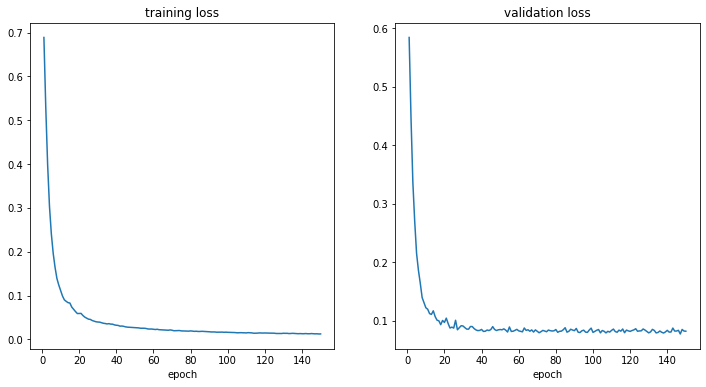

In [ ]:
# plot training and validation loss
plt.figure('', (12, 6))

plt.subplot(1, 2, 1)
plt.title("training loss")
x = [i + 1 for i in range(len(train_loss))]
y = train_loss
plt.xlabel("epoch")
plt.plot(x, y)

plt.subplot(1, 2, 2)
plt.title("validation loss")
val_interval=1
x = [val_interval * (i + 1) for i in range(len(val_loss))]
y = val_loss
plt.xlabel("epoch")
plt.plot(x, y)
plt.show() 

In [ ]:
# save trained model
os.chdir('/content/drive/My Drive/COLAB/DL_3D_MIA_project/models')

# uncomment torch.save if you want to save the model that you just trained,
# otherwise use torch.load to load the model
# if saving: change date and time when saving model, e.g. 20220615_1230_model_main_UNet_ED
# torch.save(model.state_dict(), r'20220701_1258_model_main_UNet_ED.pt')
PATH = r'20220701_1258_model_main_UNet_ED.pt'
model.load_state_dict(torch.load(PATH))


<All keys matched successfully>

# Visual evaluation of trained network


In [ ]:
def visual_evaluation(sample, model):
    """
    Allow the visual inspection the result of one sample by plotting 
    the image, the ground truth (left) and the segmentation map produced by the network (right).
    
    Args:
        sample (Dict[str, torch.Tensor]): sample composed of an image ('img') and a mask ('mask').
        model (torch.nn.Module): trained model to evaluate.
    """
    model.eval()
    inferer = monai.inferers.SimpleInferer()
    discrete_transform = monai.transforms.AsDiscrete(logit_thresh=0.5, threshold_values=True)
    with torch.no_grad():
        output = inferer(inputs=sample['img'].to(device), network=model).cpu().squeeze()
        output = torch.softmax(output, dim=0) # apply softmax function during inference (since this was not applied in the UNet itself)

    mask = np.squeeze(sample['mask'])

    # # plot predicted segmentation
    # plt.figure()
    # plt.imshow(output[3,:,:])
    # plt.show()

    # fig, ax = plt.subplots(1,2, figsize = [12, 10])
    
    # # Plot image and ground truth
    # overlay_mask = np.ma.masked_where(mask == 0, mask == 1)
    # ax[0].imshow(sample["img"].squeeze(), 'gray')
    # ax[0].imshow(overlay_mask[3,:,:], 'Greens', alpha = 0.7, clim=[0,1], interpolation='nearest')
    # ax[0].set_title('Ground truth')
    # # Plot image and predicted segmentation
    # overlay_output = np.ma.masked_where(output < 0.1, output >0.99)
    # ax[1].imshow(sample['img'].squeeze(), 'gray')
    # ax[1].imshow(overlay_output[3,:,:], 'Greens', alpha = 0.7, clim=[0,1])
    # ax[1].set_title('Prediction')
    # plt.show()

    return output, mask

In [ ]:
# create new val_dataloader with batch_size=1
val_dataloader_evaluation = monai.data.DataLoader(val_dataset_2D, batch_size=1)

print('Number of patients: ', len(validation_patient))
print('Length of validation dataset: ', len(val_dataloader_evaluation))

output_val = []
mask_val = []
for i, sample in enumerate(val_dataloader_evaluation):
    output_sample, mask_sample = visual_evaluation(sample, model)
    output_val.append(output_sample)
    mask_val.append(mask_sample)

# SAME FOR TRAINING DATASET
# create new train_dataloader with batch_size=1
train_dataloader_evaluation = monai.data.DataLoader(train_dataset_2D, batch_size=1)

print('Number of patients: ', len(train_patient))
print('Length of validation dataset: ', len(train_dataloader_evaluation))

output_train = []
mask_train = []
for i, sample in enumerate(train_dataloader_evaluation):
    output_sample, mask_sample = visual_evaluation(sample, model)
    output_train.append(output_sample)
    mask_train.append(mask_sample)


Number of patients:  20
Length of validation dataset:  181


/usr/local/lib/python3.7/dist-packages/monai/transforms/post/array.py:181: UserWarning: `threshold_values=True/False` is deprecated, please use `threshold=value` instead.
  warnings.warn("`threshold_values=True/False` is deprecated, please use `threshold=value` instead.")


Number of patients:  80
Length of validation dataset:  681


# Create 3D volume from 2D predicitons

In [ ]:
# compute number of slices per patient in validation and train dataset
nb_slices_per_patient_val=[]

i=0
for sample in val_dataset_transformed:
    i=i+1
    image = sample["img"]
    nb_slices = sample['img'].shape[3]
    nb_slices_per_patient_val.append(nb_slices)
    print(i, ": Image size: ", image.shape)

print('Number of slices per patient in validation dataset: ', nb_slices_per_patient_val)
print('Sum of number of slices: ', np.sum(nb_slices_per_patient_val))  # check whether this is the same as the size of the 2D validation dataset

# SAME FOR TRAINING DATASET
nb_slices_per_patient_train=[]

i=0
for sample in train_dataset_transformed:
    i=i+1
    image = sample["img"]
    nb_slices = sample['img'].shape[3]
    nb_slices_per_patient_train.append(nb_slices)
    # print(i, ": Image size: ", image.shape)


1 : Image size:  (1, 190, 233, 6)
2 : Image size:  (1, 214, 253, 8)
3 : Image size:  (1, 200, 267, 10)
4 : Image size:  (1, 267, 225, 9)
5 : Image size:  (1, 217, 267, 8)
6 : Image size:  (1, 206, 253, 10)
7 : Image size:  (1, 208, 247, 9)
8 : Image size:  (1, 169, 247, 9)
9 : Image size:  (1, 214, 253, 9)
10 : Image size:  (1, 225, 267, 10)
11 : Image size:  (1, 208, 247, 11)
12 : Image size:  (1, 214, 253, 10)
13 : Image size:  (1, 267, 267, 8)
14 : Image size:  (1, 233, 267, 10)
15 : Image size:  (1, 187, 233, 8)
16 : Image size:  (1, 240, 203, 10)
17 : Image size:  (1, 201, 240, 8)
18 : Image size:  (1, 197, 233, 8)
19 : Image size:  (1, 208, 247, 10)
20 : Image size:  (1, 250, 267, 10)
Number of slices per patient in validation dataset:  [6, 8, 10, 9, 8, 10, 9, 9, 9, 10, 11, 10, 8, 10, 8, 10, 8, 8, 10, 10]
Sum of number of slices:  181


In [ ]:
# create 3D volumes from 2D slices for each patient
output_val_3D = []
mask_val_3D = []
index = 0
for i, patient_number in enumerate(validation_patient):
  output_val_3D_i = torch.tensor(np.zeros([4,128,128,nb_slices_per_patient_val[i]]))
  mask_val_3D_i = torch.tensor(np.zeros([4,128,128,nb_slices_per_patient_val[i]]))
  for slice_i in range(nb_slices_per_patient_val[i]):
    output_val_3D_i[:,:,:,slice_i] = output_val[index]
    mask_val_3D_i[:,:,:,slice_i] = mask_val[index]
    index=index+1
  output_val_3D.append(output_val_3D_i)
  mask_val_3D.append(mask_val_3D_i)

# SAME FOR TRAINING DATASET
output_train_3D = []
mask_train_3D = []
index = 0
for i, patient_number in enumerate(train_patient):
  output_train_3D_i = torch.tensor(np.zeros([4,128,128,nb_slices_per_patient_train[i]]))
  mask_train_3D_i = torch.tensor(np.zeros([4,128,128,nb_slices_per_patient_train[i]]))
  for slice_i in range(nb_slices_per_patient_train[i]):
    output_train_3D_i[:,:,:,slice_i] = output_train[index]
    mask_train_3D_i[:,:,:,slice_i] = mask_train[index]
    index=index+1
  output_train_3D.append(output_train_3D_i)
  mask_train_3D.append(mask_train_3D_i)


# Compute metrics on 3D prediction crops
metrics: Dice similarity coefficient and Hausdorff distance

In [ ]:
metric_dice = monai.metrics.compute_meandice
metric_hausdorff = monai.metrics.compute_hausdorff_distance

dice_val = []
hausdorff_val = []
for i in range(len(validation_patient)):
  nb_slices = output_val_3D[i].shape[3]
  output = torch.Tensor(np.zeros([1,4,128,128,nb_slices]))
  output[0,:,:,:,:] = output_val_3D[i]
  mask = torch.Tensor(np.zeros([1,4,128,128,nb_slices]))
  mask[0,:,:,:,:] = mask_val_3D[i]

  dice_i = metric_dice(output, mask, include_background=False)
  dice_val.append(dice_i)
  hausdorff_i = metric_hausdorff(output, mask, include_background=False)
  hausdorff_i = hausdorff_i*1.5 # compute Hausdorff distance in mm instead of pixels
                                # since pixdim was (1.5, 1.5, 10) in Spacingd transform -> multiply with 1.5
  hausdorff_val.append(hausdorff_i)

# SAME FOR TRAINING DATASET
dice_train = []
hausdorff_train = []
for i in range(len(train_patient)):
  nb_slices = output_train_3D[i].shape[3]
  output = torch.Tensor(np.zeros([1,4,128,128,nb_slices]))
  output[0,:,:,:,:] = output_train_3D[i]
  mask = torch.Tensor(np.zeros([1,4,128,128,nb_slices]))
  mask[0,:,:,:,:] = mask_train_3D[i]

  dice_i = metric_dice(output, mask, include_background=False)
  dice_train.append(dice_i)
  hausdorff_i = metric_hausdorff(output, mask, include_background=False)
  hausdorff_i = hausdorff_i*1.5 # compute Hausdorff distance in mm instead of pixels
                                # since pixdim was (1.5, 1.5, 10) in Spacingd transform -> multiply with 1.5
  hausdorff_train.append(hausdorff_i)


In [ ]:
# compute mean Dice and Hausdorff for validation and training dataset
dice_label1_cumulative=0
dice_label2_cumulative=0
dice_label3_cumulative=0
hausdorff_label1_cumulative=0
hausdorff_label2_cumulative=0
hausdorff_label3_cumulative=0
for i in range(len(dice_val)):
  dice_label1_cumulative = dice_label1_cumulative+dice_val[i][0][0]
  dice_label2_cumulative = dice_label2_cumulative+dice_val[i][0][1]
  dice_label3_cumulative = dice_label3_cumulative+dice_val[i][0][2]
  hausdorff_label1_cumulative = hausdorff_label1_cumulative+hausdorff_val[i][0][0]
  hausdorff_label2_cumulative = hausdorff_label2_cumulative+hausdorff_val[i][0][1]
  hausdorff_label3_cumulative = hausdorff_label3_cumulative+hausdorff_val[i][0][2]

dice_label1_val = dice_label1_cumulative/len(dice_val)
dice_label2_val = dice_label2_cumulative/len(dice_val)
dice_label3_val = dice_label3_cumulative/len(dice_val)
hausdorff_label1_val = hausdorff_label1_cumulative/len(hausdorff_val)
hausdorff_label2_val = hausdorff_label2_cumulative/len(hausdorff_val)
hausdorff_label3_val = hausdorff_label3_cumulative/len(hausdorff_val)

print('Metrics for validation dataset: ')
print('Mean Dice similarity coefficient for label 1 (right ventricle): ', dice_label1_val.numpy())
print('Mean Dice similarity coefficient for label 2 (myocardium): ', dice_label2_val.numpy())
print('Mean Dice similarity coefficient for label 3 (left ventricle): ', dice_label3_val.numpy())
print('Mean Hausdorff distance for label 1 (right ventricle): ', hausdorff_label1_val.numpy())
print('Mean Hausdorff distance for label 2 (myocardium): ', hausdorff_label2_val.numpy())
print('Mean Hausdorff distance for label 3 (left ventricle): ', hausdorff_label3_val.numpy())

# SAME FOR TRAINING DATASET
dice_label1_cumulative=0
dice_label2_cumulative=0
dice_label3_cumulative=0
hausdorff_label1_cumulative=0
hausdorff_label2_cumulative=0
hausdorff_label3_cumulative=0
for i in range(len(dice_train)):
  dice_label1_cumulative = dice_label1_cumulative+dice_train[i][0][0]
  dice_label2_cumulative = dice_label2_cumulative+dice_train[i][0][1]
  dice_label3_cumulative = dice_label3_cumulative+dice_train[i][0][2]
  hausdorff_label1_cumulative = hausdorff_label1_cumulative+hausdorff_train[i][0][0]
  hausdorff_label2_cumulative = hausdorff_label2_cumulative+hausdorff_train[i][0][1]
  hausdorff_label3_cumulative = hausdorff_label3_cumulative+hausdorff_train[i][0][2]

dice_label1_train = dice_label1_cumulative/len(dice_train)
dice_label2_train = dice_label2_cumulative/len(dice_train)
dice_label3_train = dice_label3_cumulative/len(dice_train)
hausdorff_label1_train = hausdorff_label1_cumulative/len(hausdorff_train)
hausdorff_label2_train = hausdorff_label2_cumulative/len(hausdorff_train)
hausdorff_label3_train = hausdorff_label3_cumulative/len(hausdorff_train)

print('Metrics for training dataset: ')
print('Mean Dice similarity coefficient for label 1 (right ventricle): ', dice_label1_train.numpy())
print('Mean Dice similarity coefficient for label 2 (myocardium): ', dice_label2_train.numpy())
print('Mean Dice similarity coefficient for label 3 (left ventricle): ', dice_label3_train.numpy())
print('Mean Hausdorff distance for label 1 (right ventricle): ', hausdorff_label1_train.numpy())
print('Mean Hausdorff distance for label 2 (myocardium): ', hausdorff_label2_train.numpy())
print('Mean Hausdorff distance for label 3 (left ventricle): ', hausdorff_label3_train.numpy())


Metrics for validation dataset: 
Mean Dice similarity coefficient for label 1 (right ventricle):  0.8723563
Mean Dice similarity coefficient for label 2 (myocardium):  0.8451546
Mean Dice similarity coefficient for label 3 (left ventricle):  0.9463809
Mean Hausdorff distance for label 1 (right ventricle):  16.161999323224727
Mean Hausdorff distance for label 2 (myocardium):  9.03543721438518
Mean Hausdorff distance for label 3 (left ventricle):  6.700343034056746
Metrics for training dataset: 
Mean Dice similarity coefficient for label 1 (right ventricle):  0.98799646
Mean Dice similarity coefficient for label 2 (myocardium):  0.9712008
Mean Dice similarity coefficient for label 3 (left ventricle):  0.99100906
Mean Hausdorff distance for label 1 (right ventricle):  4.796577538550491
Mean Hausdorff distance for label 2 (myocardium):  2.6887501227919817
Mean Hausdorff distance for label 3 (left ventricle):  5.21477326477377


# Visualize results for paper

In [ ]:
mean_dice = []
for i in range(len(dice_val)):
  mean_dice.append(np.mean(dice_val[i][0].numpy()))

print(mean_dice)

dice_min = np.min(mean_dice)
index_dice_min = np.where(mean_dice == np.amin(mean_dice))
print('Index ', index_dice_min[0], ' has minimal mean dice value ', dice_min)

dice_max = np.max(mean_dice)
index_dice_max = np.where(mean_dice == np.amax(mean_dice))
print('Index ', index_dice_max[0], ' has maximal mean dice value ', dice_max)

[0.8618435, 0.8230293, 0.9010854, 0.9166444, 0.8749685, 0.9060714, 0.8456256, 0.8767142, 0.86223716, 0.86223245, 0.9382952, 0.9130952, 0.96543247, 0.86894345, 0.84894854, 0.8601988, 0.8655223, 0.94579655, 0.8993483, 0.9232456]
Index  [1]  has minimal mean dice value  0.8230293
Index  [12]  has maximal mean dice value  0.96543247


torch.Size([4, 128, 128, 8])


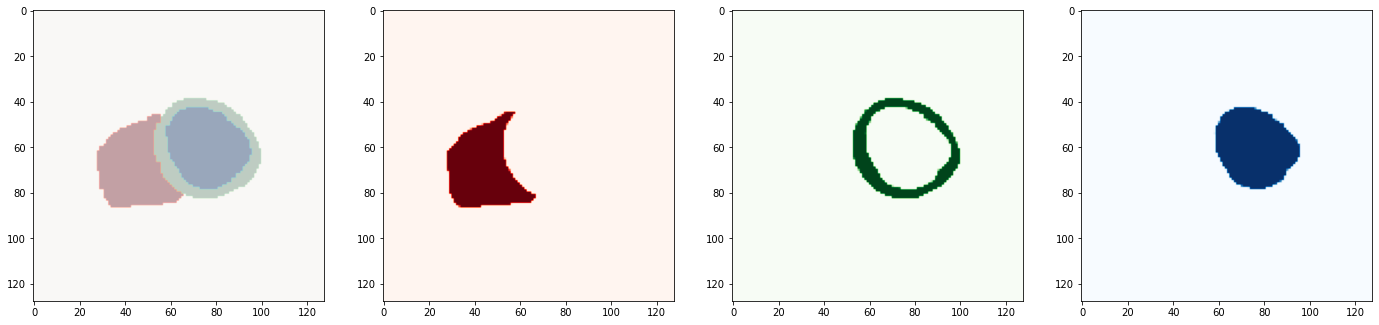

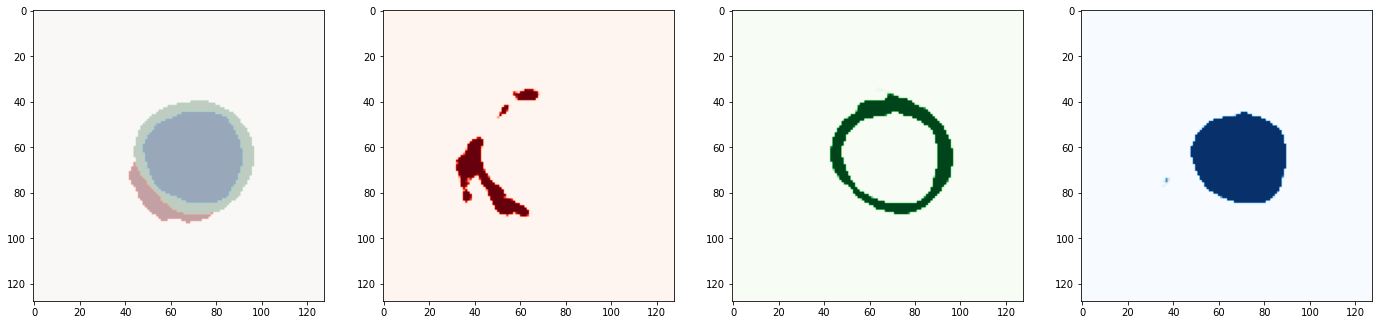

In [ ]:


print(output_val_3D[1].shape)

# best prediction
fig = plt.figure(figsize=(24, 24))

plt.subplot(2, 4, 1)
plt.imshow(np.transpose(mask_val_3D[12][1,:,:,4]), cmap='Reds')
plt.imshow(np.transpose(mask_val_3D[12][2,:,:,4]), cmap='Greens', alpha = 0.4, clim=[0,1])
plt.imshow(np.transpose(mask_val_3D[12][3,:,:,4]), cmap='Blues', alpha = 0.4, clim=[0,1])
plt.subplot(2, 4, 2)
plt.imshow(np.transpose(output_val_3D[12][1,:,:,4]), cmap='Reds')
# plt.imshow(np.transpose(mask_val_3D[12][1,:,:,3]), 'Reds', alpha = 0.2, clim=[0,1])
plt.subplot(2, 4, 3)
plt.imshow(np.transpose(output_val_3D[12][2,:,:,4]), cmap='Greens')
plt.subplot(2, 4, 4)
plt.imshow(np.transpose(output_val_3D[12][3,:,:,4]), cmap='Blues')

# worst prediction
fig = plt.figure(figsize=(24, 24))

plt.subplot(2, 4, 1)
plt.imshow(np.transpose(mask_val_3D[1][1,:,:,4]), cmap='Reds')
plt.imshow(np.transpose(mask_val_3D[1][2,:,:,4]), cmap='Greens', alpha = 0.4, clim=[0,1])
plt.imshow(np.transpose(mask_val_3D[1][3,:,:,4]), cmap='Blues', alpha = 0.4, clim=[0,1])
plt.subplot(2, 4, 2)
plt.imshow(np.transpose(output_val_3D[1][1,:,:,4]), cmap='Reds')
plt.subplot(2, 4, 3)
plt.imshow(np.transpose(output_val_3D[1][2,:,:,4]), cmap='Greens')
plt.subplot(2, 4, 4)
plt.imshow(np.transpose(output_val_3D[1][3,:,:,4]), cmap='Blues')
